# Python Trading Toolbox: step up your charts with indicator subplots
## Adding indicators to price charts with matplotlib

After a several months-long hiatus, I can finally resume posting to the Trading Toolbox Series. We started this series by learning how to plot indicators (specifically: [moving averages](https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388)) on the top of a price chart. Moving averages belong to a wide group of indicators, called **overlay indicators**, that share the same scale as the price and can, therefore, be plotted on the same chart. Other technical indicators, however, do not have this advantage and we need to plot them on a separate area, sometimes called a *subplot*.

Here is an example of a stock chart with an indicator on a separate pane taken from [Yahoo! Finance](https://uk.finance.yahoo.com/chart/QQQ):

![Candlestick chart with indicator](images/ttb04-QQQ-yahoo.png)

With this article we want to explore how to create similar charts using Matplotlib. We also want to explore how to harness Matplotlib's potential for customization and create original, publication quality charts. To start with, we will learn how we can obtain that kind of subplot using Matplotlib. Then, we will apply that to plot our first technical indicator below the price, the *Rate of Change* (or **ROC**). We will then have a look at how to do that on an OHLC bar or Candlestick chart instead of a line chart.

### Multiple subplots with matplotlib

At this stage we need to delve into some technical aspects of how Matplotlib works: That is how we can harness its multiple plots capabilities and craft publishing quality charts. All the code provided assumes that you are using **Jupyter Notebook**. If instead, you are using a more conventional text editor or the command line, you will need to add:
```
plt.show()
```
each time a chart is created in order to make it visible.

In the first two posts of this series we created our first financial price plots using the format:

```plt.plot(dates, price, <additional parameters>)```

You can see the first article on [moving averages](https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388?) or the second on [weighted and exponential moving averages](https://towardsdatascience.com/trading-toolbox-02-wma-ema-62c22205e2a9).

When calling that method, *matplotlib* does a few things behind the scenes in order to create charts:

- First, it creates an object called **figure**: this is the container where all of our charts are stored. A *figure* is created automatically and quietly, however, we can create it explicitly and access it when we need to pass some parameters, e.g. with the instruction:
```fig = plt.figure(figsize=(12,6))```
- On top of that, *matplotlib* creates an object called **axes** (do not confuse with *axis*): this object corresponds to a single subplot contained within the *figure*. Again, this action usually happens behind the scenes.

Within any *figure*, we can have multiple subplots (*axes*) arranged in a matrix:

![figure](images/ttb04-figure.png)

### Our first multiple plot charts

When it comes to charts with multiple subplots, there are enough ways and methods available to make our head spin. We are going to pick just one: the `.subplot()` method will serve our purposes well. Through other tutorials, you may come across a method called: `.add_subplots()`: the `.subplot()` method is a wrapper for `.add_subplots()` (that means it should make its use simpler). With the exception of a few details, their use is actually very similar.

Whenever we add a subplot to a figure we need to supply three parameters:
- The number of rows in the chart matrix.
- The number of columns.
- The number of the specific subplot: you can note from the diagram above that the *axes* objects are numbered going left to right, then top to bottom.

Let us try to build a practical example of a generic 2x2 multiple plot chart:

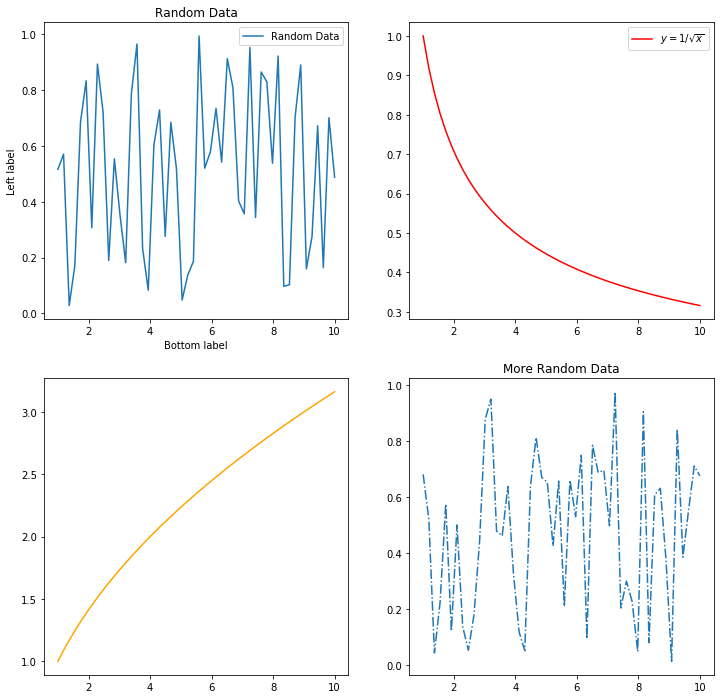

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#This tells Jupyter to display the images within the Notebook:
%matplotlib inline

# Some generic data to fill our chart:
x = np.linspace(1,10,50)
np.random.seed(101)
y1 = np.random.random(50)
y2 = 1/np.sqrt(x)
y3 = np.sqrt(x)
y4 = np.random.random(50)

# We create our figure and specify the size:
fig = plt.figure(figsize=(12,12))

# We create the subplots (axes) and assign them to a variable name:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# We can now plot the data on each of the subplots:
ax1.plot(x, y1, label = 'Random Data')
ax2.plot(x, y2, color='red', label=('$y = 1/\sqrt{x}$'))
ax3.plot(x, y3, color='orange')
ax4.plot(x, y4, linestyle='-.')

# This is how we can add a title to a single subplot:
ax1.set_title('Random Data')
ax4.set_title('More Random Data')

# This is how we add labels to the horizontal and vertical axes:
ax1.set_xlabel('Bottom label')
ax1.set_ylabel('Left label')

# This is how we make the legends visible in the subplots:
ax1.legend()
ax2.legend()

### Adding an indicator subplot to a price series

Now that we know how to create charts with multiple plots, we can apply our skills to plot an indicator at the bottom of a price chart.
For this task, we are going to use an indicator known as *Rate of Change* (**ROC**). There are actually a few different definitions of ROC, and the one that we are going to employ for our example is based on the formula:

$$ROC_t = \left( \frac{Price_{t}}{Price_{t-lag}} -1 \right) \times 100$$

where *lag* can be any whole number greater than zero and represents the number of periods (on a daily chart: days) we are looking back to compare our price. E.g., when we compute the ROC of the daily price with a 9-day lag, we are simply looking at how much, in percentage, the price has gone up (or down) compared to 9 days ago.
In this article we are not going to discuss how to interpret the ROC chart and use it for investment decisions: that should better have a dedicated article and we are going to do that in a future post.

We start by preparing our environment:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import matplotlib as mpl
print('Python version: ' + sys.version)
print('pandas version: ' + pd.__version__)
print('matplotlib version: ' + mpl.__version__)

# Required by pandas: registering  matplotlib date converters
pd.plotting.register_matplotlib_converters()

# If you are using Jupyter, use this to show the output images within the Notebook:
%matplotlib inline

Python version: 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.3
matplotlib version: 3.1.1


For this exercise, I downloaded from Yahoo! Finance daily prices for the [**Invesco QQQ Trust**](https://finance.yahoo.com/quote/QQQ), an ETF that tracks the performance of the Nasdaq 100 Index. You can find [here the CSV file that I am using](https://raw.githubusercontent.com/stebas101/TradingToolbox/master/data/QQQ.csv). We can load our data and have a glimpse at it:

In [3]:
datafile = 'data/QQQ.csv'
data = pd.read_csv(datafile, index_col = 'Date')

# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-05,183.429993,183.509995,179.199997,180.729996,179.281570,75040000
2019-08-06,182.399994,183.800003,181.070007,183.259995,181.791306,41897200
2019-08-07,181.270004,184.509995,179.889999,184.250000,182.773376,49990600
2019-08-08,185.080002,188.320007,184.570007,188.259995,186.751236,38418100
2019-08-09,187.360001,188.000000,185.029999,186.490005,184.995422,33608900
...,...,...,...,...,...,...
2020-07-30,257.739990,261.709991,256.549988,261.130005,261.130005,41774500
2020-07-31,265.910004,265.950012,260.850006,265.790009,265.790009,53756200
2020-08-03,268.000000,270.149994,267.869995,269.380005,269.380005,32081600


We can then compute a ROC series with a 9-day lag and add it as a column to our data frame:

In [4]:
lag = 9
data['ROC'] = ( data['Adj Close'] / data['Adj Close'].shift(lag) -1 ) * 100

data[['Adj Close', 'ROC']]

,Adj Close,ROC
Date,,
2019-08-05,179.281570,NaN
2019-08-06,181.791306,NaN
2019-08-07,182.773376,NaN
2019-08-08,186.751236,NaN
2019-08-09,184.995422,NaN
...,...,...
2020-07-30,261.130005,0.659160
2020-07-31,265.790009,-0.371089
2020-08-03,269.380005,2.037881


To make our example charts easier to read, we use only a selection of our available data. Here is how we select the last 100 rows, corresponding to the 100 most recent trading days:

In [5]:
data_sel = data[-100:]
dates = data_sel.index
price = data_sel['Adj Close']
roc = data_sel['ROC']

We are now ready to create our first multiple plot chart, with the price at the top and the ROC indicator at the bottom. We can note that, compared to a generic chart with subplots, our indicator has the same date and time (the horizontal axis) as the price chart:

Text(0.5, 1.0, '9-Day ROC')

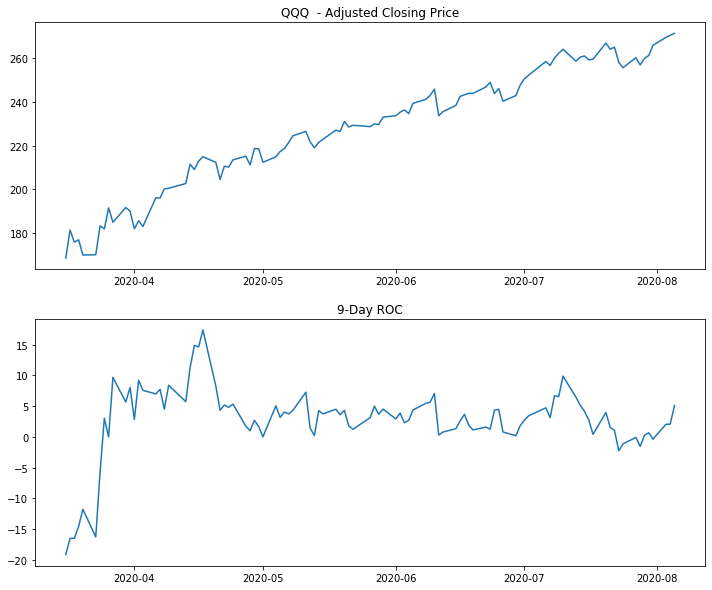

In [6]:
fig = plt.figure(figsize=(12,10))

# The price subplot:
price_ax = plt.subplot(2,1,1)
price_ax.plot(dates, price)

# The ROC subplot shares the date axis with the price plot:
roc_ax = plt.subplot(2,1,2, sharex=price_ax)
roc_ax.plot(roc)

# We can add titles to each of the subplots:
price_ax.set_title("QQQ  - Adjusted Closing Price")
roc_ax.set_title("9-Day ROC")

We have just plotted our first chart with price and ROC in separate areas: this chart does its job in the sense that it makes both price and indicator visible. It does not, however, do it in a very visually appealing way. To start with, price and ROC share the same time axis: there is no need to apply the **date labels** again on both charts. We can remove them from the top chart by using:
```
price_ax.get_xaxis().set_visible(False)
```

We can also remove the **gap between the two subplots** with:
```
fig.subplots_adjust(hspace=0)
```

It is also a good idea to add a **horizontal line** at the zero level of the ROC to make it more readable, as well as to add labels to both vertical axes.

Text(0, 0.5, '% ROC')

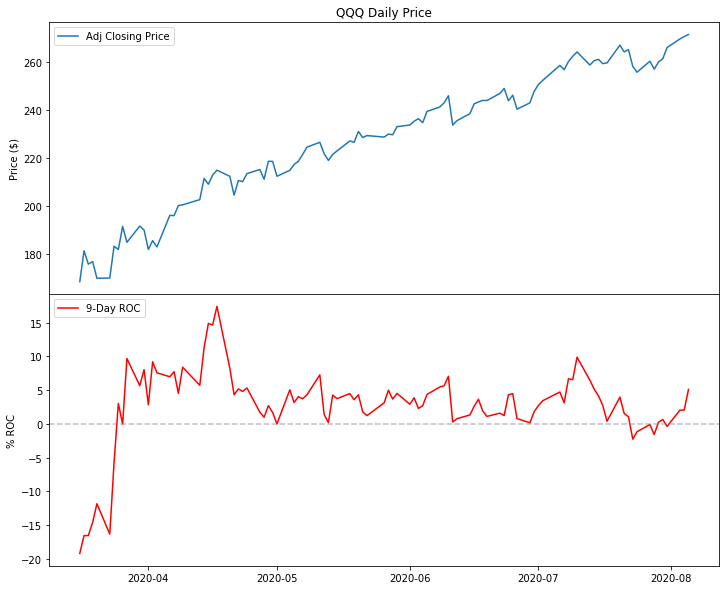

In [7]:
fig = plt.figure(figsize=(12,10))

price_ax = plt.subplot(2,1,1)
price_ax.plot(dates, price, label="Adj Closing Price")
price_ax.legend(loc="upper left")

roc_ax = plt.subplot(2,1,2, sharex=price_ax)
roc_ax.plot(roc, label="9-Day ROC", color="red")
roc_ax.legend(loc="upper left")

price_ax.set_title("QQQ Daily Price")

# Removing the date labels and ticks from the price subplot:
price_ax.get_xaxis().set_visible(False)

# Removing the gap between the plots:
fig.subplots_adjust(hspace=0)

# Adding a horizontal line at the zero level in the ROC subplot:
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)

# We can add labels to both vertical axis:
price_ax.set_ylabel("Price ($)")
roc_ax.set_ylabel("% ROC")

This chart looks already better. However, Matplotlib offers a much greater potential when it comes to creating professional looking charts. Here are some examples of what we can do:

- To enhance the readability of the ROC indicator, we can fill the areas between the plot and the horizontal line. The `.fill_between()` method will serve this purpose.
- We can format the date labels to show, for example, only the name of the month in short form (e.g., *Jan*, *Feb*, ...).
- We can use a percent format for the labels on the ROC vertical axis.
- We can add a grid to both subplots and set a background color.
- Increase the margins (padding) between the plot and the borders.
- In order to maximize the chart's [*Data-Ink Ratio*](https://infovis-wiki.net/wiki/Data-Ink_Ratio), we can remove all the spines (the borders around the subplots) and the tick marks on the horizontal and vertical axis for both subplots.
- We can also set the default size for all the fonts to a larger number, say 14.

That is quite a long list of improvements. Without getting lost too much in the details, the following code should provide a good example:

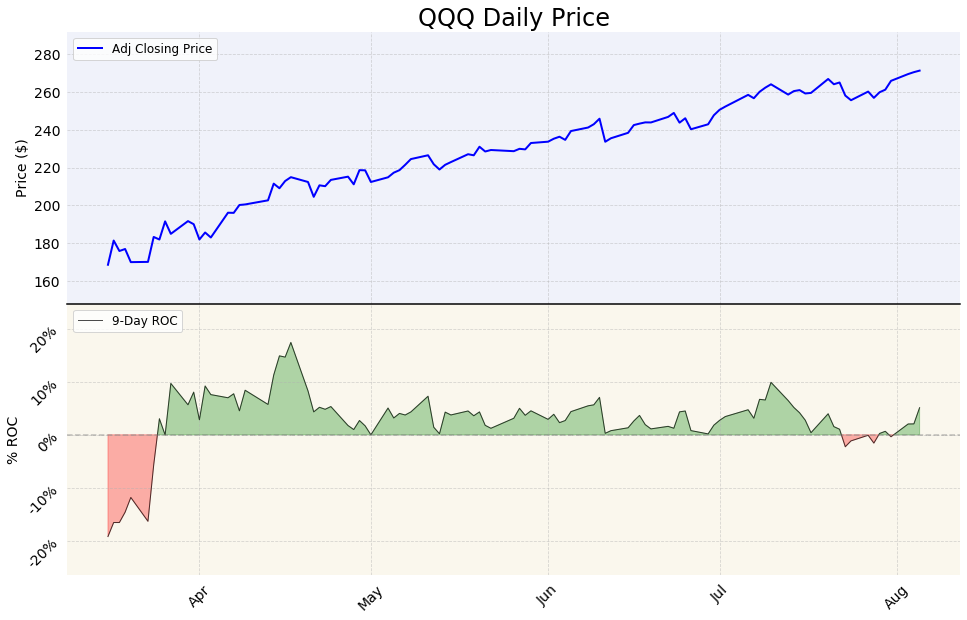

In [8]:
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0)

# Setting the size for all fonts to 14
# Note: this will change the font size permanently for all subsequent charts,
# until we reset it
plt.rcParams.update({'font.size': 14})

# This portion of code should look familiar by now:
price_ax = plt.subplot(2, 1, 1)
price_ax.plot(dates, price, color='blue', linewidth=2, label="Adj Closing Price")
price_ax.legend(loc="upper left", fontsize=12)
price_ax.set_ylabel("Price ($)")
price_ax.set_title("QQQ Daily Price", fontsize=24)

roc_ax = plt.subplot(2, 1, 2, sharex = price_ax)
roc_ax.plot(roc, color='k', linewidth = 1, alpha=0.7, label="9-Day ROC")
roc_ax.legend(loc="upper left", fontsize=12)
roc_ax.set_ylabel("% ROC")

# Adding a horizontal line at the zero level in the ROC subplot:
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)

# Filling the areas between the indicator and the level 0 line:
roc_ax.fill_between(dates, 0, roc, where = (roc >= 0), color='g', alpha=0.3, interpolate=True)
roc_ax.fill_between(dates, 0, roc, where = (roc  < 0), color='r', alpha=0.3, interpolate=True)

# Formatting the date labels
roc_ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Formatting the labels on the y axis for ROC:
roc_ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

# Adding a grid to both subplots:
price_ax.grid(b=True, linestyle='--', alpha=0.5)
roc_ax.grid(b=True, linestyle='--', alpha=0.5)

# Setting a background color for the both subplots:
price_ax.set_facecolor((.94,.95,.98))
roc_ax.set_facecolor((.98,.97,.93))

# Adding margins around the plots:
price_ax.margins(0.05, 0.2)
roc_ax.margins(0.05, 0.2)

# Hiding the tick marks from the horizontal and vertical axis:
price_ax.tick_params(left=False, bottom=False)
roc_ax.tick_params(left=False, bottom=False, labelrotation=45)

# Hiding all the spines for the price subplot:
for s in price_ax.spines.values():
    s.set_visible(False)
# Hiding all the spines for the ROC subplot:
for s in roc_ax.spines.values():
    s.set_visible(False)

# To better separate the two subplots, we reinstate a spine in between them:
# Reinstating the top spine for the bottom subplot and increasing the line width.
# We need it to separate the two subplots:
roc_ax.spines['top'].set_visible(True)
roc_ax.spines['top'].set_linewidth(1.5)


This chart provides a taster of what we can achieve by manipulating the default Matplotlib parameters. Of course, we can always achieve some visual improvements by applying an existing *style sheet* as we have done in the [first article of this series](https://towardsdatascience.com/trading-toolbox-01-sma-7b8e16bd9388), e.g. with:
```
plt.style.use('fivethirtyeight')
```

When using indicator subplots, most of the time we want the price section to take a larger area than the indicator section in the chart. To achieve this we need to manipulate the invisible grid that Matplotlib uses to place the subplots. We can do so using the [`GridSpec` function](https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html). This is another very powerful feature of Matplotlib. I will just provide a brief example of how it can be used to control the **height ratio** between our two subplots:

Text(0, 0.5, '% ROC')

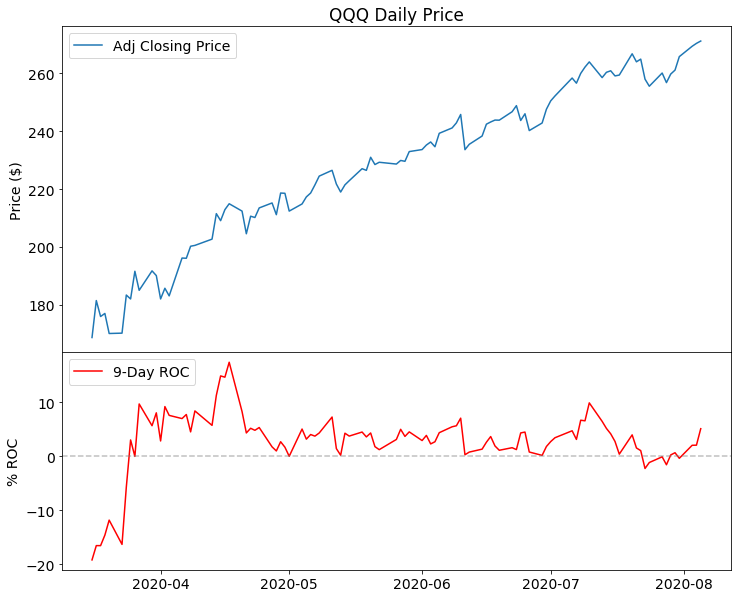

In [9]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,10))

# We set the height ratio between our subplots as 3:2:
gspec = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, height_ratios= [3, 2])

# We need to pass the gspec object when plotting:
price_ax = plt.subplot(gspec[0, 0])
price_ax.plot(dates, price, label="Adj Closing Price")
price_ax.legend(loc="upper left")

roc_ax = plt.subplot(gspec[1,0], sharex=price_ax)
roc_ax.plot(roc, label="9-Day ROC", color="red")
roc_ax.legend(loc="upper left")

price_ax.set_title("QQQ Daily Price")

price_ax.get_xaxis().set_visible(False)
fig.subplots_adjust(hspace=0)
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
price_ax.set_ylabel("Price ($)")
roc_ax.set_ylabel("% ROC")

As a side note, you may notice how this chart retained 14 as the font size set from the previous chart's code. This happens because any changes to the `rcParams` Matplotlib parameters are permanent (until we restart the system). If we need to reset them we can use:

```
plt.style.use('default')
```

and add `%matplotlib inline` if we are using Jupyter Notebook.

### Indicators with OHLC and Candlestick charts

In all of the previous examples, we charted the price as a line plot. Line plots are a good way to visualize prices when we have only one data point (in this case, the closing price) for each period of trading. Quite often, with financial price series, we want to use OHLC bar charts or Candlestick charts: those charts can show all the prices that summarize the daily trading activity (Open, High, Low, Close) instead of just Close.

To plot OHLC bar charts and candlestick charts in Matplotlib we need to use the **mplfinance** library. As I mentioned in the [previous post of this series](https://towardsdatascience.com/trading-toolbox-03-ohlc-charts-95b48bb9d748), *mplfinance* development has gathered new momentum and things are rapidly evolving. Therefore, we will deal only cursorily on how to use it to create our charts.

Mplfinance offers two methods to create subplots within charts and add an indicator:
- With the **External Axes Method** creating charts is more or less similar to what we have done so far. Mplfinance takes care of drawing the OHLC or candlesticks charts. We can then pass an *Axes* object with our indicator as a separate subplot. 
- The **Panels Method** is even easier to use than pure Matplotlib code: *mplfinance* takes control of all the plotting and styling operations for us. To manipulate the visual aspects of the chart we can apply existing styles or create our own style.

The *External Axes Method* was released less than a week ago from the time I am writing this. I am still looking forward to making use of it to find out what potential it can offer.

As a taster of what we can do using the *mplfinance* Panel Method, we can plot a candlestick chart with the volume in a separate pane:

mplfinance version: 0.12.7a0


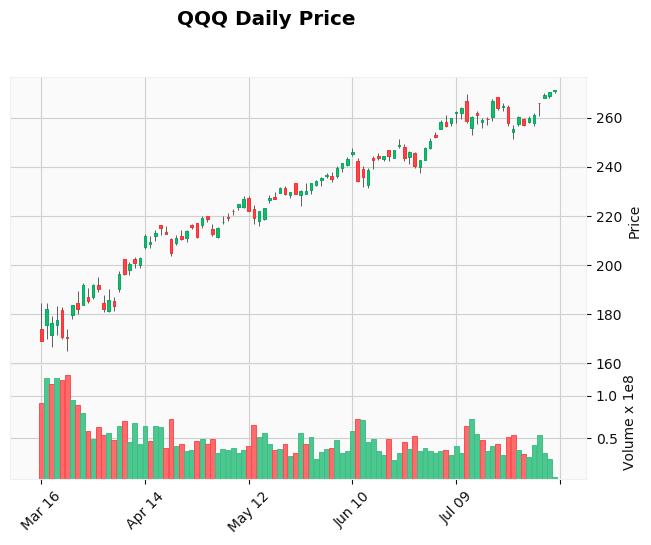

In [10]:
import mplfinance as mpf

print('mplfinance version: ' + mpf.__version__)

mpf.plot(data_sel, type='candle',  style='yahoo', title="QQQ Daily Price", volume=True)

We can add our ROC indicator in a separate subplot too:

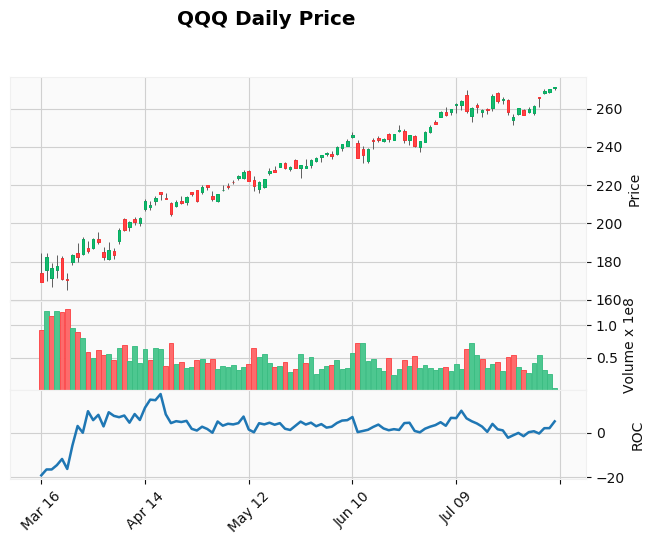

In [11]:
# We create an additional plot planing it on the third panel
roc_plot = mpf.make_addplot(roc, panel=2, ylabel='ROC')

#We pass the additional plot using the addplot parameter
mpf.plot(data_sel, type='candle',  style='yahoo', addplot=roc_plot, title="QQQ Daily Price", volume=True)


### Conclusion

There are several packages out there that make it possible to create financial charts using Python and *pandas*. In particular, [**plotly**](https://plotly.com/) stands out for its capability to create good looking interactive charts. Matplotlib, on the other hand, may not produce the best charts straight out of the box (look at [**seaborn**](https://seaborn.pydata.org/) if you need that) however, it has a huge customization potential that makes it possible to create static charts that can stand out in a professional publication.

That is why I believe it is well worth to get the grips on tweaking the properties of *matplotlib*. The future developments of *mplfinance* will make those possibilities even more appealing.